# Plotting in Python 

*examples in this notebook are based on Nicholas Hunt-Walker's [plotting tutorial](https://github.com/nhuntwalker/teaching/blob/master/plotting_in_python.ipynb) and Jake VanderPlas' [matplotlib tutorial](https://github.com/jakevdp/2014_fall_ASTR599/blob/master/notebooks/06_MatplotlibIntro.ipynb)*

Thus far we have learned how to do basic mathematical operations in python, read and write data files, write/use functions and modules, and write loops. What we have not learned is how to *visualize* our data. Making professional plots in python is actually relatively straightfoward. In this lesson we will cover some of the most basic plotting capabilities of python, but note that there is much, much more that you can do. For some examples check out the [matplotlib gallery](http://matplotlib.org/gallery.html), [seaborn gallery](http://stanford.edu/~mwaskom/software/seaborn-dev/examples/index.html), or [plotly](https://plot.ly/python/) for examples of how to make interactive plots. You can even make [xkcd style plots](http://matplotlib.org/examples/showcase/xkcd.html) with relative ease! In this notebook we will learn how to make basic plots like scatter plots, histograms and line plots in using matplotlib in python. 

## Basic Plot Commands

Some of the basic plotting commands include
```python
plt.plot()
plt.errorbar()
plt.loglog(), plt.semilogx(), plt.semilogy()
```

In [3]:
# we use matplotlib and specifically pyplot for basic plotting purposes
# the convention is to import this as "plt"
# also import things that will help use read in our data and perform other operations on it 
import matplotlib.pyplot as plt 

from astropy.io import ascii
import numpy as np 

In [4]:
# I'm also using this "magic" function to make my plots appear in this notebook
# you DO NOT need to do this in your code. only do this when working with notebooks
# if you want plots to appear in the below the cells where you are running code
%matplotlib inline

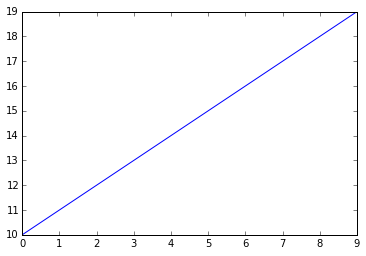

In [6]:
x = np.arange(10)
y = np.arange(10, 20)
plt.plot(x, y) # basic plotting command; it takes x,y values as well as other arguments to customize the plot 
plt.show()

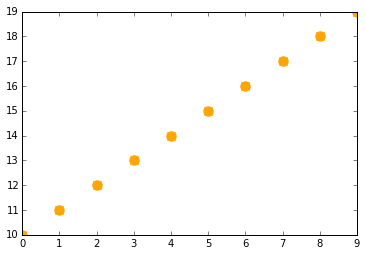

In [7]:
# you can change the plot symbol, size, color, etc. 
plt.plot(x,y,'.',markersize=20, color='orange')  
plt.show()

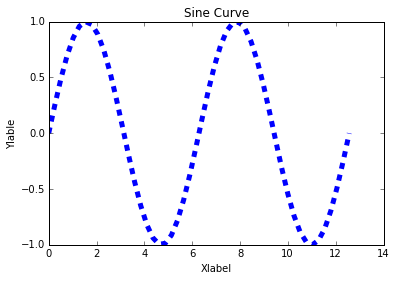

In [8]:
# instead of creating arrays you can plot a function, like a sine curve 
x = np.linspace(0,4*np.pi,50)
y = np.sin(x)
plt.plot(x,y, '--', linewidth=5) # add an argument to change the width of the plotted line, and linestyle
plt.xlabel('Xlabel') # add labels to the axes
plt.ylabel('Ylable')
plt.title('Sine Curve') # set the plot title 
plt.show()

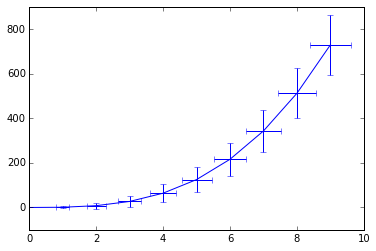

In [10]:
x = np.arange(10)
y = x**3
xerr_values = 0.2*np.sqrt(x)
yerr_values = 5*np.sqrt(y)
plt.errorbar(x,y, xerr=xerr_values, yerr=yerr_values) # adding errorbars to a plot 
plt.show()

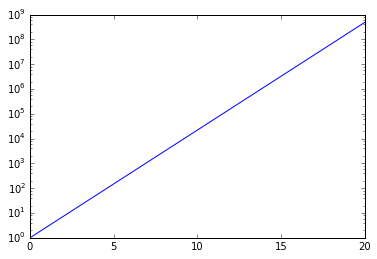

In [11]:
# for log plots there is the option of plt.loglog(), plt.semilogx(), plt.semilogy()
x = np.linspace(0,20)
y = np.exp(x)
plt.semilogy(x,y) 
plt.show()

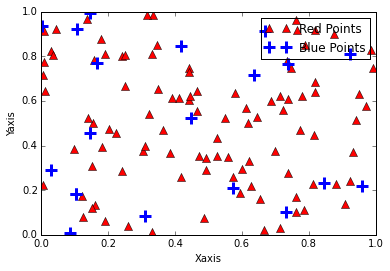

In [13]:
# it is also simple to add legends to your plots in matplotlib
# you simply need to include the "label" argument in your plot command 
# and then add "plt.legend()"
xred = np.random.rand(100)
yred = np.random.rand(100)
xblue = np.random.rand(20)
yblue = np.random.rand(20)
plt.plot(xred, yred, '^', 
         color='red', markersize=8, label='Red Points')
plt.plot(xblue, yblue, '+', 
         color='blue', markersize=12, markeredgewidth=3, label='Blue Points')
plt.xlabel('Xaxis')
plt.ylabel('Yaxis')
plt.legend() # this has the optional argument "loc" to tell the legend where to go 
plt.show()

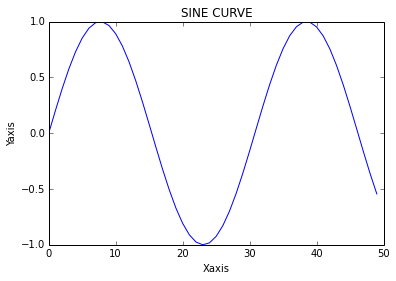

In [3]:
# to save figures in python you just use "plt.savefig()"
plt.plot(np.sin(np.linspace(0, 10)))
plt.title('SINE CURVE')
plt.xlabel('Xaxis')
plt.ylabel('Yaxis')
plt.savefig('sineplot.png') # just feed savefig the file name, or path to file name that you want to write
plt.show()

## Scatter Plots 

In [14]:
# first let's read in some data to use for plotting
galaxy_table = ascii.read('data/mygalaxy.dat')
galaxy_table[:5]

col1,col2
float64,float64
49.3317,3.74013
50.3509,4.76035
65.766,1.99268
46.5797,4.27444
25.0454,0.277328


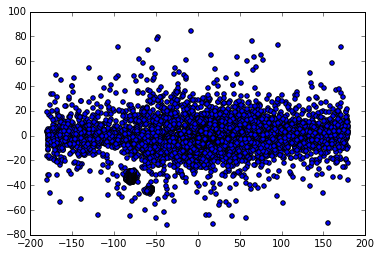

In [15]:
# simple scatter plot
plt.scatter(galaxy_table['col1'], galaxy_table['col2'])
plt.show()

**SIDE NOTE:** If you are running things in the IPython environment or from a script you would want to do something like the following to get your plots to show up in a new window:
```python
plt.scatter(galaxy_table['col1'], galaxy_table['col2'])
plt.show()
```

In an IPython Notebook, you will see the plot outputs whether or not you call `plt.show()` because we've used the `%matplotlib inline` magic function.

Let's break down these basic examples:
- We are running functions called "plot" or "scatter" that take specific arguments.
- The most basic arguments that these functions take are in the form of (x,y) values for the plot, and we get these from a data table. 
- We can use more specific arugments like 'o' to customize things like the plot symbol (marker) that we are using. 

With plt.scatter() you can change things like point color, point size, point edge color and point type. The argument syntax for adding these options are as follows: 

- color = 'colorname'; could be 'b' for blue, 'k' for black, 'r' for red
- s = number; changes marker size
- markeredgecolor = `None` or 'colorname'
- marker = 'symbolname', i.e. `'s'` for square, `'o'` for circle, `'+'` for cross, `'x'` for x, `'*'` for star, `'^'` for triangle, etc.

Let's do an example:

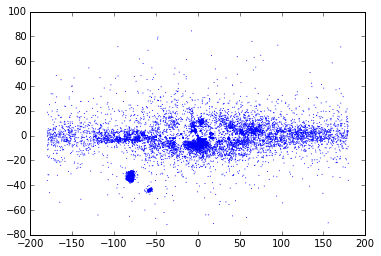

In [17]:
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], 
            color='blue', s=1, edgecolor='None', marker='o')
plt.show()

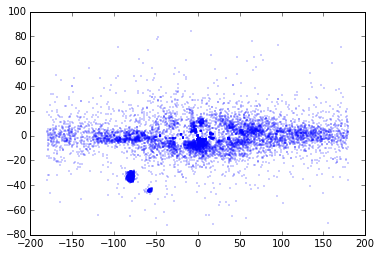

In [18]:
# here would be the equivalent statement using plt.plot(), note that the syntax is a little different 
plt.plot(galaxy_table['col1'], galaxy_table['col2'], 'o', 
         color='blue', markersize=1, markeredgecolor='None')
plt.show()

The plot is starting to look better, but there is one really important thing that is missing: **axis labels.** These are very easy to put in in matplotlib using ```plt.xlabel() and plt.ylabel().``` These functions take strings as their arguments for the labels, but can also take other arguments that case the text format: 

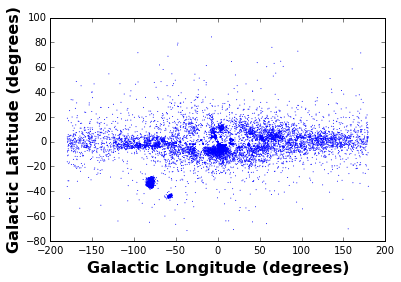

In [19]:
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], color='blue', 
            s=1, edgecolor='None', marker='o')

plt.xlabel('Galactic Longitude (degrees)', 
           fontweight='bold', size=16)
plt.ylabel('Galactic Latitude (degrees)', 
           fontweight='bold', size=16)
plt.show()

We can also change things like the axis limits with ```plt.xlim()``` and ```plt.ylim().``` For these we just want to feed it a range of values for each axis: 

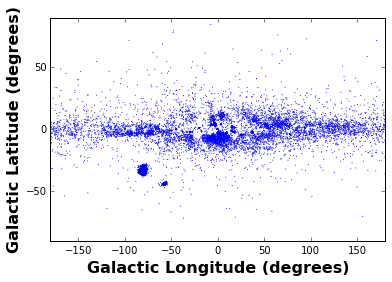

In [21]:
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], 
            color='blue', s=1, edgecolor='None', marker='o')

plt.xlabel('Galactic Longitude (degrees)', 
           fontweight='bold', size=16)
plt.ylabel('Galactic Latitude (degrees)', 
           fontweight='bold', size=16)

plt.xlim([-180,180])
plt.ylim([-90,90])
plt.show()

The axis labels are easy to read, but the numbers and tick marks on the axis are pretty small. We can tweak lots of little things about how the tick marks look, how they are spaced, and if we want to have a grid to guide the reader's eyes. I will give just a couple of examples here: 

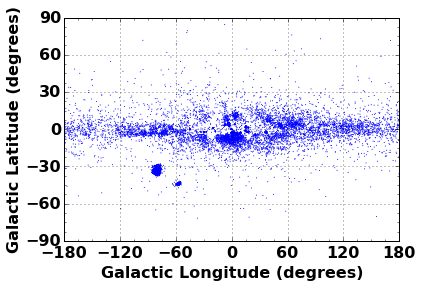

In [23]:
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], 
            color='blue', s=1, edgecolor='None', marker='o')

# Labels
plt.xlabel('Galactic Longitude (degrees)', 
           fontweight='bold', size=16)
plt.ylabel('Galactic Latitude (degrees)', 
           fontweight='bold', size=16)

# Set limits
plt.xlim([-180,180])
plt.ylim([-90,90])

# Choose axis ticks
plt.xticks(range(-180,210,60), fontsize=16, fontweight='bold') # change tick spacing, font size and bold
plt.yticks(range(-90,120,30), fontsize=16, fontweight='bold')

# turn on minor tick marks 
plt.minorticks_on()

plt.grid() # turn on a background grip to guide the eye 
plt.show()

By default the figure is square, but maybe this is not the best way to represent our data. If this is the case we can change the size of the figure: 

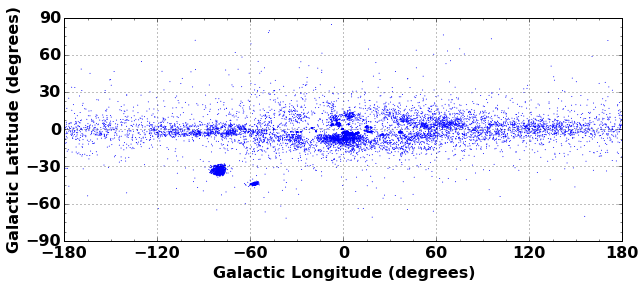

In [24]:
plt.figure(figsize=(10,4)) # change figure size 
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], 
            color='blue', s=1, edgecolor='None', marker='o')

# Labels
plt.xlabel('Galactic Longitude (degrees)', 
           fontweight='bold', size=16)
plt.ylabel('Galactic Latitude (degrees)', 
           fontweight='bold', size=16)

# Set limits
plt.xlim([-180,180])
plt.ylim([-90,90])

# Choose axis ticks
plt.xticks(range(-180,210,60), fontsize=16, fontweight='bold') # change tick spacing, font size and bold
plt.yticks(range(-90,120,30), fontsize=16, fontweight='bold')

# turn on minor tick marks 
plt.minorticks_on()

plt.grid() # turn on a background grip to guide the eye 
plt.show()

The last thing I'll mention here is how to put text on plots. This too is simple as long as you specify (x,y) coordinates for the text. 

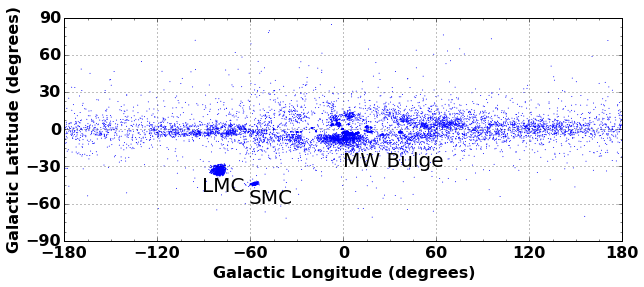

In [25]:
plt.figure(figsize=(10,4)) # change figure size 
plt.scatter(galaxy_table['col1'], galaxy_table['col2'], 
            color='blue', s=1, edgecolor='None', marker='o')

# the next three lines put text on the figure at the specified coordinates
plt.text(-90, -50, 'LMC', fontsize=20) 
plt.text(-60, -60, 'SMC', fontsize=20)
plt.text(0, -30, 'MW Bulge', fontsize=20)

plt.xlabel('Galactic Longitude (degrees)', 
           fontweight='bold', size=16)
plt.ylabel('Galactic Latitude (degrees)', 
           fontweight='bold', size=16)

plt.xlim([-180,180])
plt.ylim([-90,90])

plt.xticks(range(-180,210,60), fontsize=16, fontweight='bold') # change tick spacing, font size and bold
plt.yticks(range(-90,120,30), fontsize=16, fontweight='bold')
plt.minorticks_on() # turn on minor tick marks 
plt.grid() # turn on a background grip to guide the eye 
plt.show()

## Histograms 

Histograms can be a great way to visualize data, and they are (surprise) easy to make it python! The basic command is 
```python
    num, bins, patches = plt.hist(array, bins=number)
```
Num refers to the number of elements in each bin, and bins refers to each bin on the x-axis. Note that bins actually gives you bin EDGES, so there will always be num+1 number of bins. We can ignore patches for now. As arguments plt.hist() takes an array and the number of bins you would like (default is bins=10). Some other optional arguments for plt.hist are: 

- **range:** lower and upper range of bins 
- **normed:** set to 'True' or 'False.' If true it will return a normalized probability distribution instead of just raw number counts for the y-axis. 
- **histtype:** can be step to something like 'step', 'stepfilled', or 'bar' for the histogram style. 
- **weights:** an array of values that must be of the same size as the number of bins. It controls the factor by which the number counts are weighted, i.e. it makes your number counts into number_counts*weight. As an example, if you wanted to plot the fraction in each bin you would make weights into an array where each element is 1/total # in bin. 

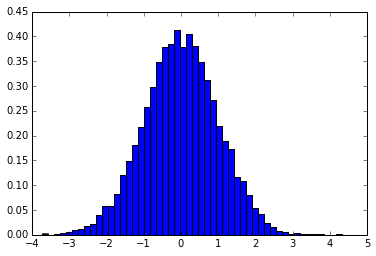

In [42]:
num, bins, patches = plt.hist(np.random.randn(10000), bins=50, normed=True)

In [45]:
# print out num and bins and see what they look like! what size is each array?
# how would you plot this histogram using plt.plot? what is the x value and what is the y value? 



## Subplots

Subplots are a way put multiple plots in what amounts to the same figure; think of subplots like an array of plots! The following picture is helpful for understanding how matplotlib places subplots based on row, column, and figure number:

<img src="images/subplot-grid.png">

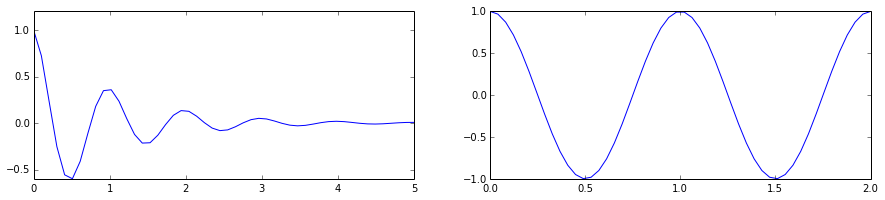

In [64]:
# make two side by side plots 

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.figure(figsize=[15,3])
plt.subplot(1,2,1) # 1 row, 2 columns, 1st figure 
plt.plot(x1,y1)

plt.subplot(1,2,2) # 1 row, 2 columsn, 2nd figure 
plt.plot(x2,y2)


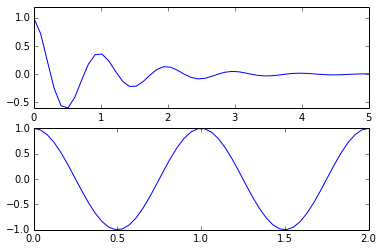

In [65]:
# stack two plots on top of one another

plt.subplot(2,1,1) # 1 row, 2 columns, 1st figure 
plt.plot(x1,y1)

plt.subplot(2,1,2) # 1 row, 2 columsn, 2nd figure 
plt.plot(x2,y2)


You can do fancier things with subplots like have different plots share the same axis, put smaller plots as insets to larger plots, etc. Again, take a look at things like the matplotlib library for examples of different plots. 

## Plotting Exoplanets 

Let's try to make some plots with a new dataset. The file that we'll use is taken from [exoplanets.eu](exoplanets.eu). 

In [1]:
# don't worry about this way to read in files right now 
import pandas as pd 
exoplanets = pd.read_csv('data/exoplanet.eu_catalog_1022.csv')

/Users/KG/anaconda/lib/python2.7/site-packages/pandas/computation/expressions.py:21: UserWarning: The installed version of numexpr 2.0.1 is not supported in pandas and will be not be used
The minimum supported version is 2.1

  "version is 2.1\n".format(ver=ver), UserWarning)


In [5]:
# get rid of some rows with missing values to be safe
exoplanets = exoplanets[np.isfinite(exoplanets['orbital_period'])]

In [6]:
# let's see what the data table looks like
exoplanets.head()

,# name,mass,mass_error_min,mass_error_max,radius,radius_error_min,radius_error_max,orbital_period,orbital_period_error_min,orbital_period_error_max,...,mag_k,star_distance,star_metallicity,star_mass,star_radius,star_sp_type,star_age,star_teff,star_detected_disc,star_magnetic_field
0,11 Com b,19.40,1.50,1.50,NaN,NaN,NaN,326.03,0.32,0.32,...,NaN,110.60,-0.35,2.70,19.000,G8 III,NaN,4742,NaN,NaN
1,11 UMi b,10.50,2.47,2.47,NaN,NaN,NaN,516.22,3.25,3.25,...,NaN,119.50,0.04,1.80,24.080,K4III,1.56,4340,NaN,NaN
2,14 And b,5.33,0.57,0.57,NaN,NaN,NaN,185.84,0.23,0.23,...,2.33,76.40,-0.24,2.20,11.000,K0III,NaN,4813,NaN,NaN
3,14 Her b,4.64,0.19,0.19,NaN,NaN,NaN,1773.40,2.50,2.50,...,NaN,18.10,0.43,0.90,0.708,K0 V,5.10,5311,NaN,NaN
4,16 Cyg B b,1.68,0.07,0.07,NaN,NaN,NaN,799.50,0.60,0.60,...,NaN,21.41,0.08,1.01,0.980,G2.5 V,8.00,5766,NaN,NaN


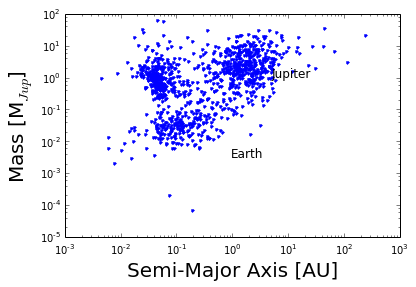

In [7]:
# plot distance from host star versus mass (in jupiter masses) for each exoplanet 
plt.loglog(exoplanets['semi_major_axis'], exoplanets['mass'],'.')
plt.annotate("Earth", xy=(1,1/317.), size=12)
plt.annotate("Jupiter", xy=(5,1), size=12)
plt.xlabel('Semi-Major Axis [AU]',size=20)
plt.ylabel('Mass [M$_{Jup}$]', size=20)

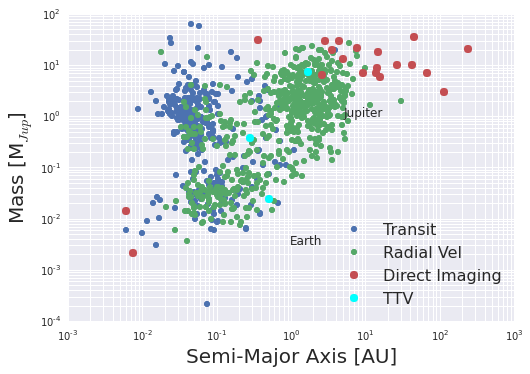

In [8]:
# let's try to find out if the blobs above separate out by detection type
import seaborn as sns; sns.set()
transits = exoplanets[exoplanets['detection_type'] == 'Primary Transit']
radial_vel = exoplanets[exoplanets['detection_type'] == 'Radial Velocity']
imaging = exoplanets[exoplanets['detection_type'] == 'Imaging']
ttv = exoplanets[exoplanets['detection_type'] == 'TTV']
plt.loglog(transits['semi_major_axis'], transits['mass'], '.', label='Transit',markersize=12)
plt.loglog(radial_vel['semi_major_axis'], radial_vel['mass'], '.', label='Radial Vel', markersize=12)
plt.loglog(imaging['semi_major_axis'], imaging['mass'], '.', label='Direct Imaging', markersize=16)
plt.loglog(ttv['semi_major_axis'], ttv['mass'], '.', label='TTV', color='cyan', markersize=16)
plt.annotate("Earth", xy=(1,1/317.), size=12)
plt.annotate("Jupiter", xy=(5,1), size=12)
plt.xlabel('Semi-Major Axis [AU]', size=20)
plt.ylabel('Mass [M$_{Jup}$]', size=20)
plt.legend(loc=4, prop={'size':16})



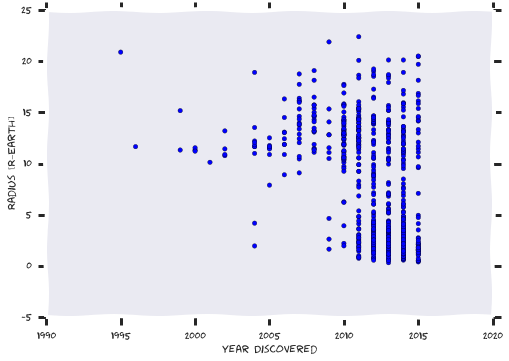

In [9]:
# and now just for fun an xkcd style plot! 
plt.xkcd()
plt.scatter(exoplanets['discovered'], exoplanets['radius']*11)
plt.xlabel('Year Discovered')
plt.ylabel('Radius [R_Earth]')